Cargar el framework tensorflow y verificar su versión

In [1]:
import tensorflow as tf
# from tensorflow import keras
print(tf.__version__)

2.8.0


# MNIST

**MNIST** es una base de datos de dígitos escritos a mano, que se compone de un conjunto de entrenamiento de 60000 imágenes, y un conjunto de prueba de 10000 imágenes

http://yann.lecun.com/exdb/mnist/

In [2]:
digit_mnist = tf.keras.datasets.mnist
(X_train_whole, y_train_whole), (X_test, y_test) = digit_mnist.load_data()

In [3]:
print(f'Numero de imagenes para entrenamiento {X_train_whole.shape[0]}, de tamaño {X_train_whole.shape[1]}x{X_train_whole.shape[2]}')
print(f'Numero de imagenes para validación {X_test.shape[0]}, de tamaño {X_test.shape[1]}x{X_test.shape[2]}')

Numero de imagenes para entrenamiento 60000, de tamaño 28x28
Numero de imagenes para validación 10000, de tamaño 28x28


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 198 

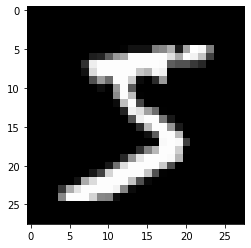

In [4]:
import numpy as np
# linewidth - número de caracteres por línea
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
# Mapa de color: gris
plt.imshow(X_train_whole[0], cmap="gray") # "Blues" "viridis" (G, Y, B)

print(y_train_whole[0])
print(X_test[0])

Tipo de datos

In [5]:
X_train_whole.dtype

dtype('uint8')

## Dataset para entrenamiento


Dividir el conjunto *X_train_whole* en dos conjuntos: el de entrenamiento y el de validación

In [6]:
X_valid, X_train = X_train_whole[:12000], X_train_whole[12000:]
y_valid, y_train = y_train_whole[:12000], y_train_whole[12000:]
print(X_train.shape)
print(X_valid.shape)

(48000, 28, 28)
(12000, 28, 28)


In [7]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train_whole, y_train_whole, test_size=0.2, random_state=42)
print(X_train_1.shape)
print(X_test_1.shape)

(48000, 28, 28)
(12000, 28, 28)


Normalización de datos

In [8]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
print(X_valid[0,10,8:15])


[0.         0.05490196 0.00392157 0.60392157 0.99215686 0.35294118 0.        ]


Clases del problema

Dígitos del 0 al 9

# Red neuronal (modelo)

Capas

*  **Sequential** - SECUENCIA de capas (apiladas) en la red neuronal
*  **Dense** - Capa de neuronas densamente conectada
*  **Flatten** - Convierte un arreglo bidimensional (matrix) a un vector de una dimensión.

Funciones de activación

*   **Relu** Si X>0 devuelve X, si no, devuelve 0
*   **Softmax** toma un conjunto de valores, y escoge el más grande.

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model_ = tf.keras.Sequential()
model_.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_.add(tf.keras.layers.Dense(512, activation='relu'))
model_.add(tf.keras.layers.Dense(10, activation='softmax'))

Número de parámetros

In [10]:
model.summary()
model_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)        

**Configuración del modelo**

*   *optimizer* - Optimizador (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   *loss* - Función de perdida
*   *metrics* - Métricas para la evaluación (desempeño) del modelo

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = "sgd",
              metrics = ["accuracy"]
              )

Entrenamiento del modelo

*   epochs - Número de epocas para entrenar el modelo
*   validation_data - Conjunto de datos que se emplean para evaluar la perdida al final de cada epoca.
*   batch_size - Número de muestras para actualización del gradiente
*   verbose - Salida del proceso de entrenamiento (0, 1, 2)

In [12]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), verbose=1, batch_size=32)

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6639 - accuracy: 0.8340 - val_loss: 0.3341 - val_accuracy: 0.9080
Epoch 2/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3021 - accuracy: 0.9142 - val_loss: 0.2649 - val_accuracy: 0.9256
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2504 - accuracy: 0.9296 - val_loss: 0.2280 - val_accuracy: 0.9366
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2168 - accuracy: 0.9380 - val_loss: 0.2072 - val_accuracy: 0.9417
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1915 - accuracy: 0.9459 - val_loss: 0.1882 - val_accuracy: 0.9466
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1713 - accuracy: 0.9513 - val_loss: 0.1681 - val_accuracy: 0.9519
Epoch 7/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1545 - accuracy: 0.9555 - val_loss: 0.1548 - val_accuracy:

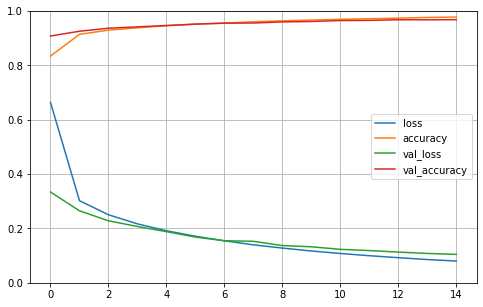

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 13.6527 - accuracy: 0.9694


[13.652666091918945, 0.9693999886512756]